## Team Members

- Diego Alfaro Pinto A01709971
- Daniel Queijeiro Albo A01710441
- Diego Fuentes Juvero A01705506
- Jesus Ramirez Delgado A01274723
- Mauricio Anguiano Juarez A01703337
- Luis Adrián Uribe Cruz A01783129

## TC 3007B
### Word Embeddings

<br>

#### Activity 1: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (10%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    - Functionality (90%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (15% each for a total of 30%)
       - Similarity function (30%)
       - Analogy function (30%)
|



#### Import libraries

In [ ]:
# Import libraries
import numpy as np
from numpy.linalg import norm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle

plt.style.use('ggplot')

#### Load file

In [ ]:
# Path to the GloVe embeddings file
# Update this path to where you downloaded and extracted glove.6B.zip
PATH = 'glove.6B.50d.txt'
emb_dim = 50

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    """
    Load GloVe embeddings from a text file and return a dictionary.

    Args:
        path: Path to the GloVe embeddings file

    Returns:
        Dictionary mapping words to their embedding vectors (numpy arrays)
    """
    embeddings_dict = {}

    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings_dict[word] = vector

    return embeddings_dict

In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [ ]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [ ]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA):
    """
    Reduce dimensionality of word embeddings and plot them in 2D.

    Args:
        emb_path: Path to embeddings file (not used, kept for compatibility)
        words2show: List of words to visualize
        emb_dim: Dimension of embeddings
        embeddings_dict: Dictionary of word embeddings
        func: Dimensionality reduction function (PCA or TSNE)

    Returns:
        The reduced embeddings array
    """
    # Filter words that exist in the embeddings dictionary
    valid_words = [word for word in words2show if word in embeddings_dict]

    if len(valid_words) == 0:
        print("No valid words found in embeddings dictionary")
        return None

    # Create embedding matrix for the selected words
    embeddings_matrix = np.array([embeddings_dict[word] for word in valid_words])

    # Apply dimensionality reduction
    if func == PCA:
        reducer = PCA(n_components=2)
        reduced_embeddings = reducer.fit_transform(embeddings_matrix)
        title = "PCA Visualization of Word Embeddings"
    else:
        # TSNE
        perplexity = min(30, len(valid_words) - 1)  # perplexity must be less than n_samples
        reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity)
        reduced_embeddings = reducer.fit_transform(embeddings_matrix)
        title = "t-SNE Visualization of Word Embeddings"

    # Plot the embeddings
    plt.figure(figsize=(14, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)

    # Add word labels
    for i, word in enumerate(valid_words):
        plt.annotate(word,
                     xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     fontsize=9)

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()
    plt.show()

    return reduced_embeddings

In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


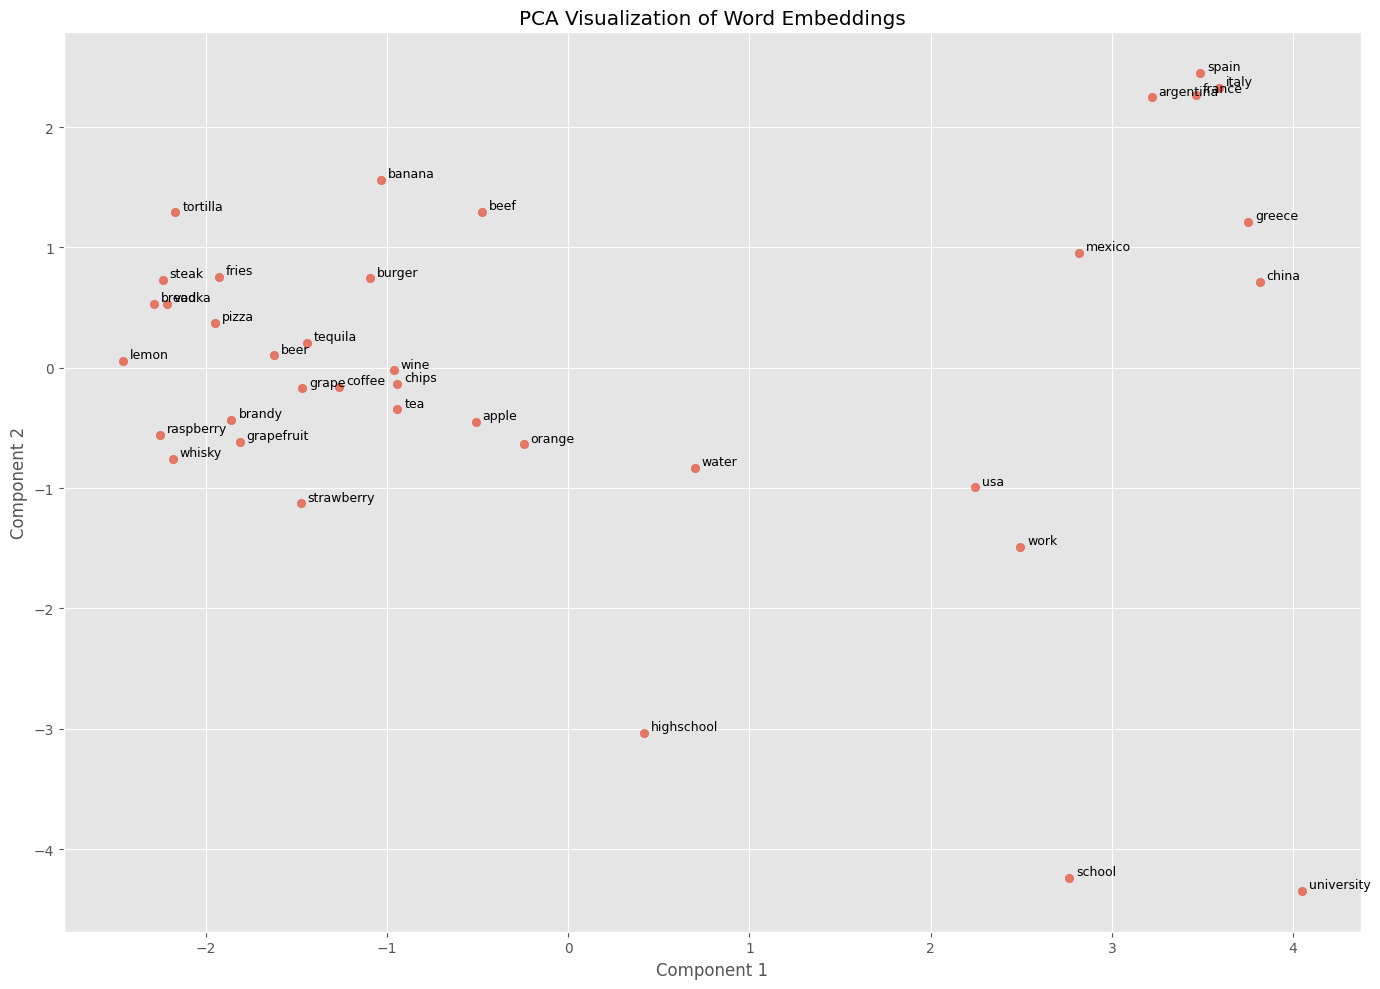

array([[-1.0925041 ,  0.74372876],
       [-2.1670628 ,  1.292367  ],
       [-2.2834158 ,  0.52902204],
       [-1.9500184 ,  0.3721772 ],
       [-0.47766322,  1.2940513 ],
       [-2.2378066 ,  0.7307441 ],
       [-1.92657   ,  0.75569266],
       [-0.9450014 , -0.13504937],
       [ 3.2193754 ,  2.246692  ],
       [ 2.8189163 ,  0.95552075],
       [ 3.488131  ,  2.4482503 ],
       [ 2.2472813 , -0.9943583 ],
       [ 3.4618902 ,  2.269228  ],
       [ 3.5916219 ,  2.3245144 ],
       [ 3.7501671 ,  1.2115402 ],
       [ 3.8158362 ,  0.7147594 ],
       [ 0.69911534, -0.83254534],
       [-1.6239517 ,  0.10265356],
       [-1.439923  ,  0.20648277],
       [-0.962911  , -0.02196907],
       [-2.1817415 , -0.7590347 ],
       [-1.8575069 , -0.43355262],
       [-2.2137516 ,  0.52904844],
       [-1.2642858 , -0.15639098],
       [-0.9421787 , -0.34516948],
       [-0.5101739 , -0.45191413],
       [-1.033432  ,  1.5628412 ],
       [-0.24471143, -0.6360452 ],
       [-2.4575224 ,

In [ ]:
#
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

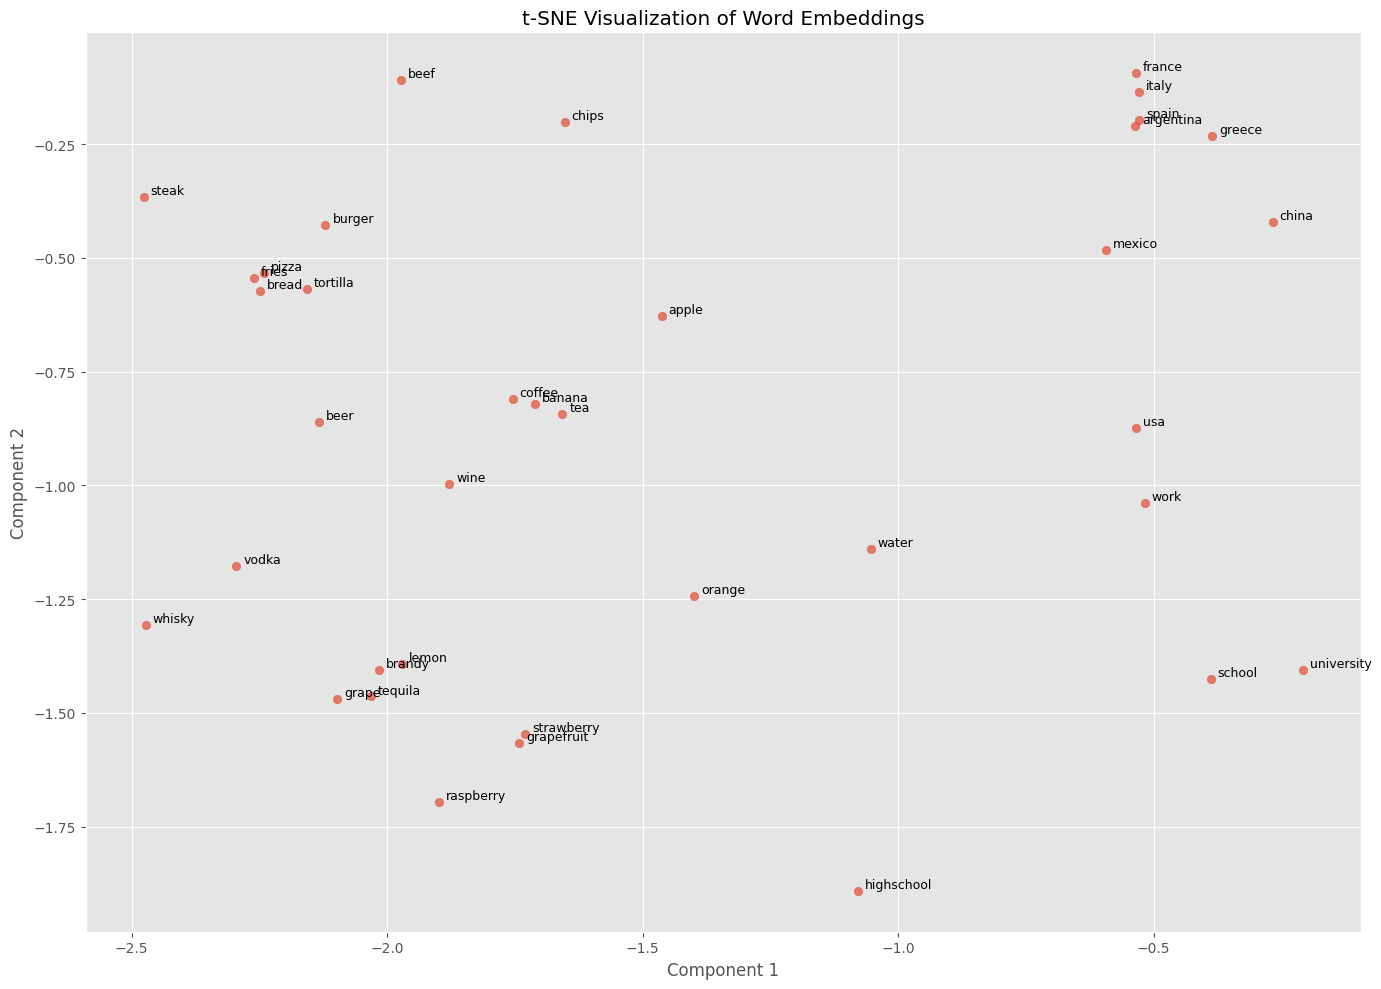

In [ ]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

In [ ]:
def cosine_similarity(v1, v2):
    """
    Compute cosine similarity between two vectors using numpy.

    Args:
        v1: First vector
        v2: Second vector

    Returns:
        Cosine similarity value
    """
    return np.dot(v1, v2) / (norm(v1) * norm(v2))


def analogy(word1, word2, word3, embeddings_dict):
    """
    Solve word analogies: word1 is to word2 as word3 is to ?

    Uses the vector arithmetic: result = word2 - word1 + word3

    Args:
        word1: First word in the analogy (e.g., 'man')
        word2: Second word in the analogy (e.g., 'king')
        word3: Third word in the analogy (e.g., 'woman')
        embeddings_dict: Dictionary of word embeddings

    Returns:
        The word that best completes the analogy
    """
    # Check if all words exist in the dictionary
    for word in [word1, word2, word3]:
        if word not in embeddings_dict:
            print(f"Word '{word}' not found in embeddings dictionary")
            return None

    # Get embeddings for the input words
    v1 = embeddings_dict[word1]
    v2 = embeddings_dict[word2]
    v3 = embeddings_dict[word3]

    # Compute the target vector: word2 - word1 + word3
    # This represents: king - man + woman = queen
    target_vector = v2 - v1 + v3

    # Find the word with highest cosine similarity to the target vector
    best_word = None
    best_similarity = -np.inf

    # Words to exclude from results (the input words)
    exclude_words = {word1, word2, word3}

    for word, vector in embeddings_dict.items():
        if word in exclude_words:
            continue

        similarity = cosine_similarity(target_vector, vector)

        if similarity > best_similarity:
            best_similarity = similarity
            best_word = word

    return best_word

In [ ]:
# Test the analogy function: man is to king as woman is to ?
result = analogy('man', 'king', 'woman', embeddings_dict)
print(f"man : king :: woman : {result}")

man : king :: woman : queen


In [ ]:
def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Find the n most similar words to a given word based on cosine similarity.

    Args:
        word: The input word to find similar words for
        embeddings_dict: Dictionary of word embeddings
        top_n: Number of similar words to return (default: 10)

    Returns:
        List of tuples (word, similarity_score) sorted by similarity in descending order
    """
    if word not in embeddings_dict:
        print(f"Word '{word}' not found in embeddings dictionary")
        return None

    # Get the embedding for the input word
    word_vector = embeddings_dict[word]

    # Calculate cosine similarity with all other words
    similarities = []

    for other_word, other_vector in embeddings_dict.items():
        if other_word == word:
            continue

        similarity = cosine_similarity(word_vector, other_vector)
        similarities.append((other_word, similarity))

    # Sort by similarity in descending order and return top_n
    similarities.sort(key=lambda x: x[1], reverse=True)

    return similarities[:top_n]

In [ ]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


### Conclusions

**PCA vs t-SNE Visualization:**
- PCA (Principal Component Analysis) provides a linear dimensionality reduction that preserves global structure and variance. It is faster and deterministic but may not capture complex non-linear relationships between words.
- t-SNE (t-distributed Stochastic Neighbor Embedding) is a non-linear technique that excels at preserving local structure and revealing clusters in the data. It is better for visualizing semantic groupings but is slower and stochastic.

**Word Similarity:**
- The cosine similarity metric effectively captures semantic relationships between words. Words with similar meanings or that appear in similar contexts have vectors that point in similar directions in the embedding space.

**Word Analogies:**
- The vector arithmetic approach (word2 - word1 + word3) demonstrates that GloVe embeddings capture meaningful semantic and syntactic relationships. Classic examples like "man:king :: woman:queen" work because the gender relationship is encoded consistently across related word pairs.

**Observations:**
- The quality of results depends on the dimensionality of the embeddings (50D, 100D, 200D, 300D). Higher dimensions generally capture more nuanced relationships but require more memory.
- Pre-trained embeddings like GloVe are trained on large corpora (Wikipedia, Common Crawl) and thus capture general language patterns, though they may not perform well on domain-specific vocabulary.

In [ ]:
# Test similarity with different words
test_words = ['computer', 'dog', 'happy']

for test_word in test_words:
    print(f"\nMost similar words to '{test_word}':")
    similar = find_most_similar(test_word, embeddings_dict)
    if similar:
        for i, (w, score) in enumerate(similar, 1):
            print(f"  {i}. {w} ({score:.4f})")


Most similar words to 'computer':
  1. computers (0.9165)
  2. software (0.8815)
  3. technology (0.8526)
  4. electronic (0.8126)
  5. internet (0.8060)
  6. computing (0.8026)
  7. devices (0.8016)
  8. digital (0.7992)
  9. applications (0.7913)
  10. pc (0.7883)

Most similar words to 'dog':
  1. cat (0.9218)
  2. dogs (0.8513)
  3. horse (0.7908)
  4. puppy (0.7755)
  5. pet (0.7725)
  6. rabbit (0.7721)
  7. pig (0.7490)
  8. snake (0.7399)
  9. baby (0.7396)
  10. bite (0.7388)

Most similar words to 'happy':
  1. 'm (0.9142)
  2. everyone (0.8976)
  3. everybody (0.8965)
  4. really (0.8840)
  5. me (0.8785)
  6. definitely (0.8763)
  7. maybe (0.8757)
  8. 'd (0.8718)
  9. feel (0.8708)
  10. i (0.8707)


### Additional Similarity Tests

In [ ]:
# Test more analogies
print(f"france : paris :: italy : {analogy('france', 'paris', 'italy', embeddings_dict)}")
print(f"spain : madrid :: germany : {analogy('spain', 'madrid', 'germany', embeddings_dict)}")
print(f"slow : slower :: fast : {analogy('slow', 'slower', 'fast', embeddings_dict)}")
print(f"big : bigger :: small : {analogy('big', 'bigger', 'small', embeddings_dict)}")

france : paris :: italy : rome
spain : madrid :: germany : munich
slow : slower :: fast : faster
big : bigger :: small : larger
